In [ ]:
LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

LOAD DATA SET

In [4]:
Data = pd.read_csv("25RP20258.csv") 
print(Data)

     Unnamed: 0  Temperature  Crop_Yield
0             0    27.483571   58.922301
1             1    24.308678   44.070420
2             2    28.238443   63.490857
3             3    32.615149   58.221043
4             4    23.829233   50.592752
..          ...          ...         ...
115         115    26.507737   56.185069
116         116    24.826441   39.527169
117         117    19.156610   39.245491
118         118    30.714114   58.119296
119         119    28.759665   61.781497

[120 rows x 3 columns]


In [29]:
Data.head()

,Unnamed: 0,Temperature,Crop_Yield
0,0,27.483571,58.922301
1,1,24.308678,44.070420
2,2,28.238443,63.490857
3,3,32.615149,58.221043
4,4,23.829233,50.592752


In [30]:
Data.isnull().sum(0)

Unnamed: 0     0
Temperature    0
Crop_Yield     0
dtype: int64

In [33]:
Data.tail()

,Unnamed: 0,Temperature,Crop_Yield
115,115,26.507737,56.185069
116,116,24.826441,39.527169
117,117,19.156610,39.245491
118,118,30.714114,58.119296
119,119,28.759665,61.781497


In [10]:
min_temp = Data['Temperature'].min()
max_temp = Data['Temperature'].max()
print("Temperature Analysis")
print("Lowest Temperature:", min_temp, "°C")
print("Highest Temperature:", max_temp, "°C")

Temperature Analysis
Lowest Temperature: 11.90127448 °C
Highest Temperature: 37.31621056 °C


In [15]:
min_yield = Data['Crop_Yield'].min()
max_yield = Data['Crop_Yield'].max()
print("\nCrop Yield Analysis")
print("Lowest Crop Yield:", min_yield, "tons/hectare")
print("Highest Crop Yield:", max_yield, "tons/hectare")


Crop Yield Analysis
Lowest Crop Yield: 24.40945936 tons/hectare
Highest Crop Yield: 74.39633178 tons/hectare


SEPARATE THE DATA SET INTO FEATURE AND TARGET

In [16]:
X = Data[['Temperature']]   # Feature
y = Data['Crop_Yield'] 

SPLIT DATA INTO TRAINING AND TESTING 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
  

1.LINEAR REGRESSION MODEL

TRAIN LINEAR REGRESSION

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

PREDICTION OF LINEAR REGRESSION

In [20]:
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

EVALUATE LINEAR REGRESSION MODEL

In [21]:
lr_mse_train = mean_squared_error(y_train, y_train_pred_lr)
lr_mse_test = mean_squared_error(y_test, y_test_pred_lr)

lr_r2_train = r2_score(y_train, y_train_pred_lr)
lr_r2_test = r2_score(y_test, y_test_pred_lr)

print("LINEAR REGRESSION RESULTS")
print("Training MSE:", lr_mse_train)
print("Testing MSE:", lr_mse_test)
print("Training R²:", lr_r2_train)
print("Testing R²:", lr_r2_test)

LINEAR REGRESSION RESULTS
Training MSE: 22.152323848957312
Testing MSE: 37.75854544001958
Training R²: 0.8025918031728353
Testing R²: 0.7167858894077912


RONDOM FOREST MODEL

TRAIN RONDOM FOREST MODEL

In [22]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

PREDICTION FOR RANDOM FOREST

In [23]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

EVALUATION OF RANDOM FOREST MODEL

In [24]:
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)

print("\nRANDOM FOREST RESULTS")
print("Training MSE:", rf_mse_train)
print("Testing MSE:", rf_mse_test)
print("Training R²:", rf_r2_train)
print("Testing R²:", rf_r2_test)


RANDOM FOREST RESULTS
Training MSE: 4.424158391174686
Testing MSE: 41.64544532724082
Training R²: 0.9605745592907322
Testing R²: 0.6876315646928997


IDENTIFY THE BEST PERFORMANCE MODEL

In [25]:
print("Model Performance Comparison (Testing Set)")
print("-------------------------------------------")
print(f"Linear Regression - Test MSE: {lr_mse_test:.4f}, Test R²: {lr_r2_test:.4f}")
print(f"Random Forest     - Test MSE: {rf_mse_test:.4f}, Test R²: {rf_r2_test:.4f}")

if (rf_mse_test < lr_mse_test) and (rf_r2_test > lr_r2_test):
    print("\n✅ Random Forest is the best performing model.")
elif (lr_mse_test < rf_mse_test) and (lr_r2_test > rf_r2_test):
    print("\n✅ Linear Regression is the best performing model.")
else:
    print("\n⚠️ Both models show similar performance.")

Model Performance Comparison (Testing Set)
-------------------------------------------
Linear Regression - Test MSE: 37.7585, Test R²: 0.7168
Random Forest     - Test MSE: 41.6454, Test R²: 0.6876

✅ Linear Regression is the best performing model.


SAVE BEST PERFORMING MODEL AS MY REGISTRATION NUMBER

In [27]:
import pickle

# Compare models and save the best one
if (rf_mse_test < lr_mse_test) and (rf_r2_test > lr_r2_test):
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = lr_model
    best_model_name = "Linear Regression"

# Save the best model using registration number
filename = "25RP20258.pkl"
pickle.dump(best_model, open(filename, 'wb'))

print(f"✅ Best Performing Model ({best_model_name}) saved as '{filename}'")

✅ Best Performing Model (Linear Regression) saved as '25RP20258.pkl'


VISUALISE THE REGRESSION LINE

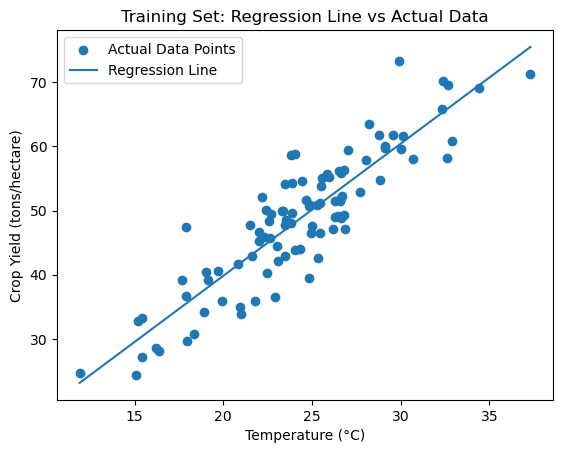

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sort values for a clean regression line
X_train_sorted = X_train.sort_values(by='Temperature')
y_train_sorted_pred = lr_model.predict(X_train_sorted)

plt.figure()
plt.scatter(X_train, y_train, label="Actual Data Points")
plt.plot(X_train_sorted, y_train_sorted_pred, label="Regression Line")
plt.xlabel("Temperature (°C)")
plt.ylabel("Crop Yield (tons/hectare)")
plt.title("Training Set: Regression Line vs Actual Data")
plt.legend()
plt.show()